<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/main/6_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50

# # Load ResNet50 model
# model = ResNet50(weights='imagenet')

# # Print model summary
# # model.summary()

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Flatten
from keras.models import Model

In [106]:
input_shape = (224,224,3)
num_classes = 2
batch_size = 32

In [107]:
train_dir = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
test_dir = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [115]:
train_datagen = ImageDataGenerator (rescale = 1./225,)
test_datagen = ImageDataGenerator (rescale = 1./225)

In [129]:
train_gen  = train_datagen.flow_from_directory(
    train_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 2251 images belonging to 2 classes.


In [130]:
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode='rgb'
)

Found 250 images belonging to 2 classes.


In [131]:
train_gen.image_shape

(224, 224, 3)

In [132]:
import numpy as np

In [133]:
# train_gen = np.expand_dims(train_gen,axis=0)

In [134]:
test_gen.image_shape

(224, 224, 3)

In [135]:
resnet = ResNet50(include_top = False, input_shape = input_shape)

In [136]:
for layer in resnet.layers:
  layer.trainable = False

In [137]:
x = Flatten()(resnet.output)
output = Dense(num_classes,activation='softmax')(x)

In [138]:
model = Model(inputs=resnet.input,outputs=output)

In [139]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [140]:
import tensorflow as tf

In [159]:
history = model.fit(train_gen,epochs=25,validation_data=test_gen)

Epoch 1/25
71/71 [==============================] - 12s 174ms/step - loss: 0.0778 - accuracy: 0.9738 - val_loss: 0.7673 - val_accuracy: 0.7680
Epoch 2/25
71/71 [==============================] - 14s 194ms/step - loss: 0.2287 - accuracy: 0.9120 - val_loss: 0.6706 - val_accuracy: 0.7920
Epoch 3/25
71/71 [==============================] - 13s 181ms/step - loss: 0.1174 - accuracy: 0.9516 - val_loss: 1.4958 - val_accuracy: 0.6600
Epoch 4/25
71/71 [==============================] - 12s 172ms/step - loss: 0.0578 - accuracy: 0.9796 - val_loss: 0.8183 - val_accuracy: 0.7720
Epoch 5/25
71/71 [==============================] - 14s 197ms/step - loss: 0.0212 - accuracy: 0.9964 - val_loss: 0.8398 - val_accuracy: 0.7600
Epoch 6/25
71/71 [==============================] - 12s 164ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 1.0350 - val_accuracy: 0.7160
Epoch 7/25
71/71 [==============================] - 12s 170ms/step - loss: 0.0117 - accuracy: 0.9996 - val_loss: 0.7759 - val_accuracy: 0.7520

In [162]:
import matplotlib.pyplot as plt
import pandas as pd


In [164]:
# plt.figure()
# plt.xlabel('No. of epochs')
# plt.ylabel("Accuracy")
# x = acc
# plt.plot(epo,x,label='acc')
# plt.legend()

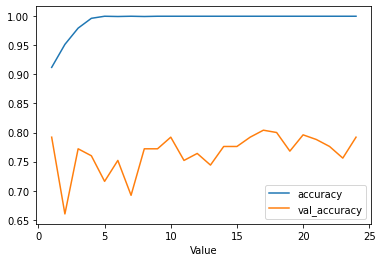

In [166]:
acc = pd.DataFrame(history.history)
epo = history.epoch

plt.figure()
plt.xlabel("No. of epochs")
plt.xlabel("Value")
for m in ['accuracy','val_accuracy']:
  x = history.history[m]
  plt.plot(epo[1:],x[1:],label=m)
plt.legend()